Ricky Jonathan H.T 0706022210005


# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

In [30]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/rickyjooooooe/DATASET/refs/heads/main/Bank.csv"
data = pd.read_csv(url,delimiter=";")
data.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1639,27,entrepreneur,single,secondary,no,376,yes,yes,cellular,5,may,273,1,-1,0,unknown,no
330,37,admin.,married,secondary,no,121,no,no,cellular,22,jul,22,6,-1,0,unknown,no
3651,57,retired,married,tertiary,no,0,no,no,cellular,12,aug,116,4,-1,0,unknown,no
1219,47,blue-collar,married,primary,no,320,no,no,telephone,30,jul,203,2,-1,0,unknown,no
971,44,admin.,married,secondary,no,262,yes,no,cellular,9,jul,74,1,-1,0,unknown,no
2999,40,management,married,tertiary,no,294,yes,no,cellular,23,jul,97,5,-1,0,unknown,no
1985,29,student,single,unknown,no,145,no,no,cellular,14,aug,105,1,-1,0,unknown,no
648,29,entrepreneur,married,secondary,no,178,yes,no,cellular,5,may,231,4,-1,0,unknown,no
118,39,blue-collar,married,primary,no,52,no,no,cellular,13,aug,69,1,-1,0,unknown,no
2313,51,housemaid,divorced,tertiary,no,370,yes,no,cellular,19,aug,109,3,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


To start, I used df.info() to inspect the dataset’s structure, confirming data types, the total number of non-null values, and the entries in each column. The dataset consists of 4,521 entries across 17 columns, with both numerical and categorical data types.
Based on this inspection, all columns have 4,521 non-null entries, indicating there are no missing values. The dataset includes various data types, with int64 for numerical data (e.g., age, balance) and object for categorical data (e.g., job, marital status).



In [32]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


From this, I noticed that the balance variable has the highest range, with both large positive and negative values, indicating significant variability in client account balances. On the other hand, previous (number of prior contacts) has a very limited range, which might indicate minimal impact for modeling.

In [33]:
print(data['y'].value_counts())


y
no     4000
yes     521
Name: count, dtype: int64


I examined the distribution of the target variable (y) to understand how balanced the dataset is in terms of subscriptions to term deposits.There is a clear imbalance: most entries are labeled “no,” with 4,000 clients not subscribing to term deposits versus 521 who did. This imbalance is something to keep in mind, as it may affect the performance of certain classifiers.

In [34]:
for column in data.columns:
    unknown_count = data[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")


Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0


Some columns in the dataset contain the value unknown, which represents missing or unspecified data. I wanted to assess how prevalent these unknown values were to decide if they should be dropped, replaced, or retained.From this inspection, the poutcome column (outcome of previous campaigns) has a high number of unknown values. However, since I’m not using this feature in my model, I can retain it as is. For the contact column, which is useful for predictions, I opted to replace unknown values with the mode, as shown below:

In [35]:
data['contact'] = data['contact'].replace('unknown', data['contact'].mode()[0])


In [36]:
data['job'] = data['job'].replace(['admin.', 'management'], 'admin_management')
data.sample(n=10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4154,56,self-employed,married,secondary,no,800,no,yes,cellular,9,jul,170,1,-1,0,unknown,no
2018,54,admin_management,divorced,tertiary,no,7010,no,no,cellular,11,mar,275,2,-1,0,unknown,no
2266,55,admin_management,married,secondary,no,0,no,no,cellular,23,sep,180,2,238,3,success,no
3240,43,technician,single,secondary,no,34,no,no,telephone,30,jul,29,1,-1,0,unknown,no
2236,32,admin_management,divorced,secondary,yes,-18,yes,no,cellular,12,may,155,3,-1,0,unknown,no
1432,35,unknown,married,primary,no,365,no,no,cellular,29,aug,41,2,-1,0,unknown,no
2343,38,admin_management,married,tertiary,no,223,no,no,cellular,28,jan,63,1,-1,0,unknown,no
2076,46,technician,married,secondary,no,1427,yes,no,cellular,14,may,32,3,-1,0,unknown,no
2669,58,housemaid,married,primary,no,0,yes,no,telephone,9,jul,148,1,-1,0,unknown,no
336,33,blue-collar,married,primary,no,-195,no,no,cellular,20,sep,9,1,-1,0,unknown,no


Upon reviewing the job column, I noted that the admin. and management roles are quite similar in context. To simplify the model and potentially improve accuracy, I decided to combine these two categories under a single label admin_management.

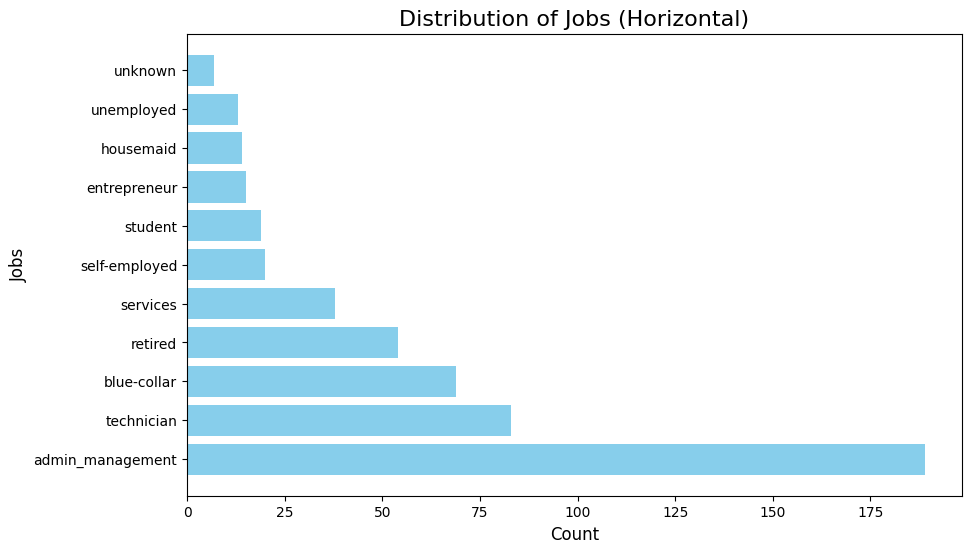

In [37]:
job_counts = data[data['y'] == 'yes']['job'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(job_counts.index, job_counts.values, color='skyblue')
plt.title('Distribution of Jobs (Horizontal)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Jobs', fontsize=12)
plt.show()


<ipython-input-38-6048090a278c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[data['y'] == 'yes'], x='job', order=job_counts.index, palette='viridis')


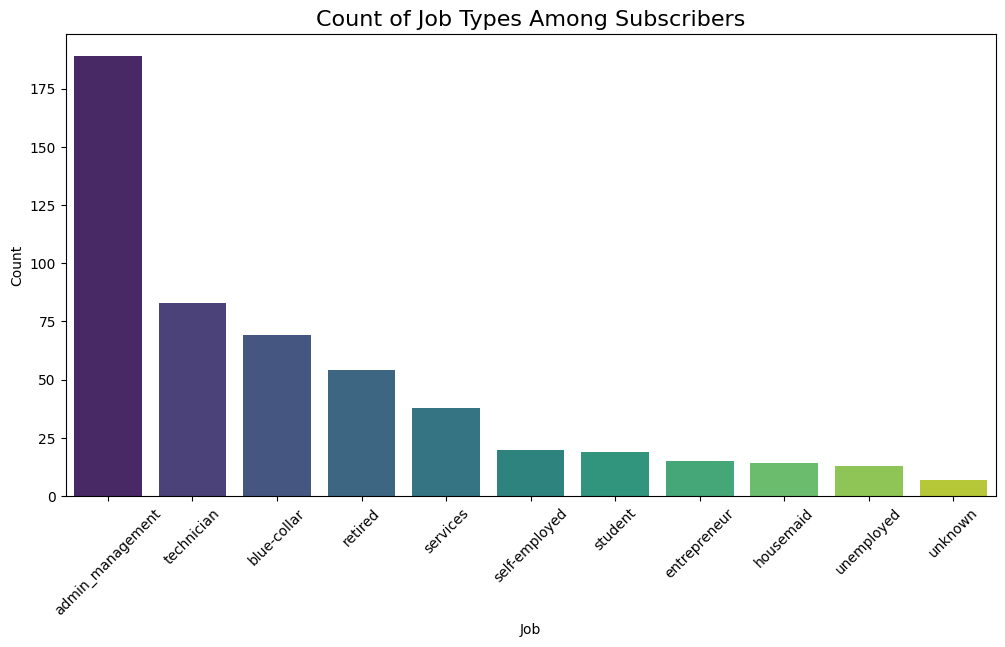

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data[data['y'] == 'yes'], x='job', order=job_counts.index, palette='viridis')
plt.title('Count of Job Types Among Subscribers', fontsize=16)
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


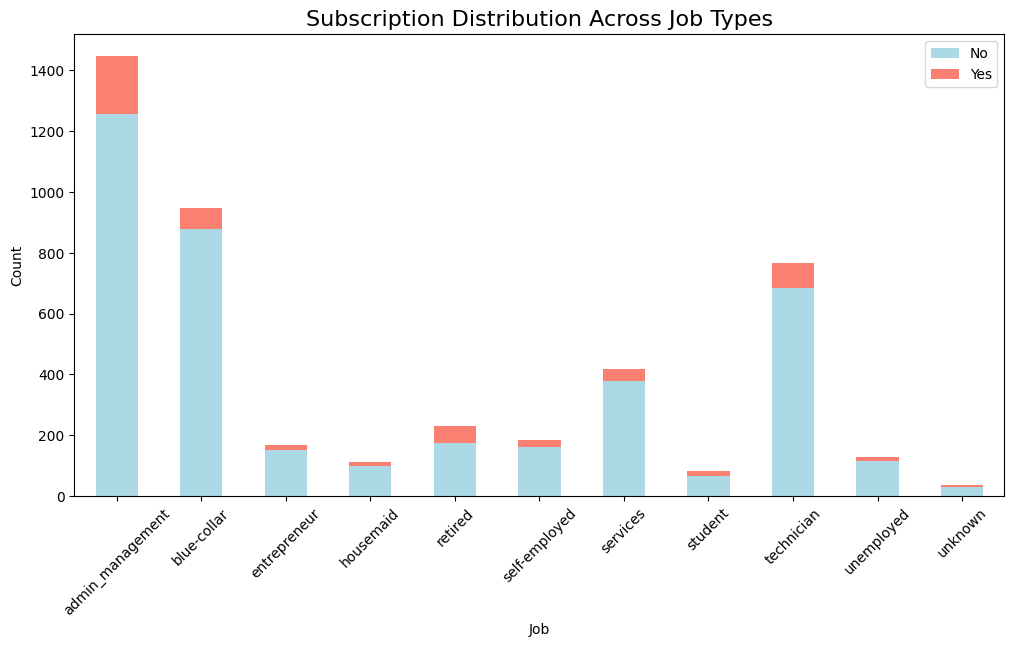

In [39]:
job_yes_no = data.groupby(['job', 'y']).size().unstack()

job_yes_no.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title('Subscription Distribution Across Job Types', fontsize=16)
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No', 'Yes'])
plt.show()


<ipython-input-40-d2e17892f574>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[data['y'] == 'yes'], x='job', y='age', palette='coolwarm')


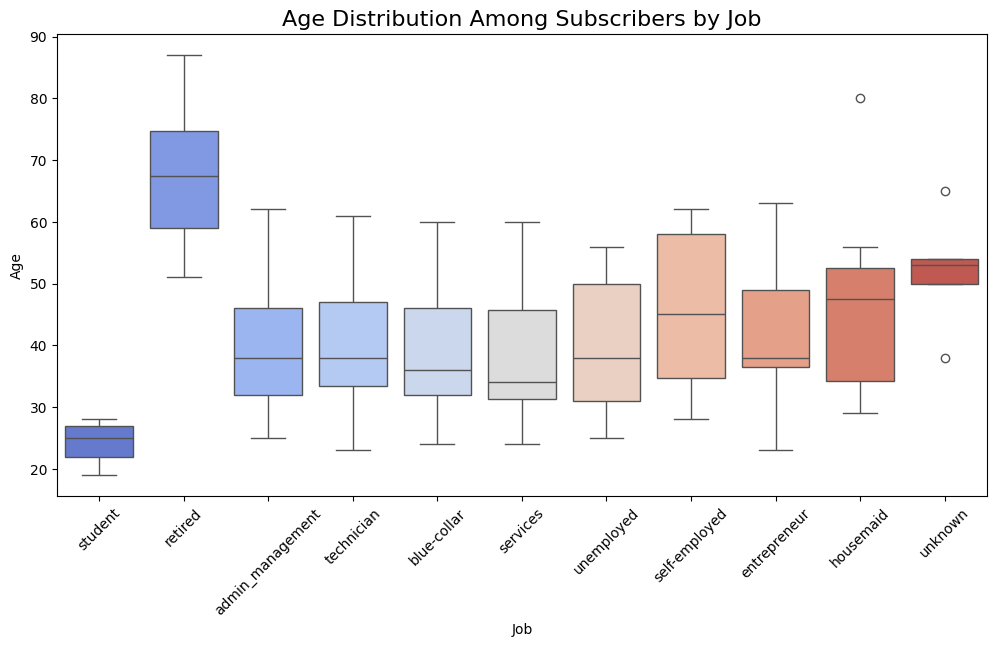

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data[data['y'] == 'yes'], x='job', y='age', palette='coolwarm')
plt.title('Age Distribution Among Subscribers by Job', fontsize=16)
plt.xlabel('Job')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [44]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))

data.sample(n = 5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2142,31,6,2,1,0,864,1,0,0,6,8,100,1,-1,0,3,0
2668,36,0,1,2,0,428,0,0,0,28,8,121,1,-1,0,3,0
1923,66,4,1,1,0,4785,0,0,0,13,1,72,3,-1,0,3,0
705,35,5,0,2,0,1354,1,0,0,23,8,736,2,-1,0,3,1
32,59,0,1,1,0,42,0,0,0,21,9,40,1,-1,0,3,0


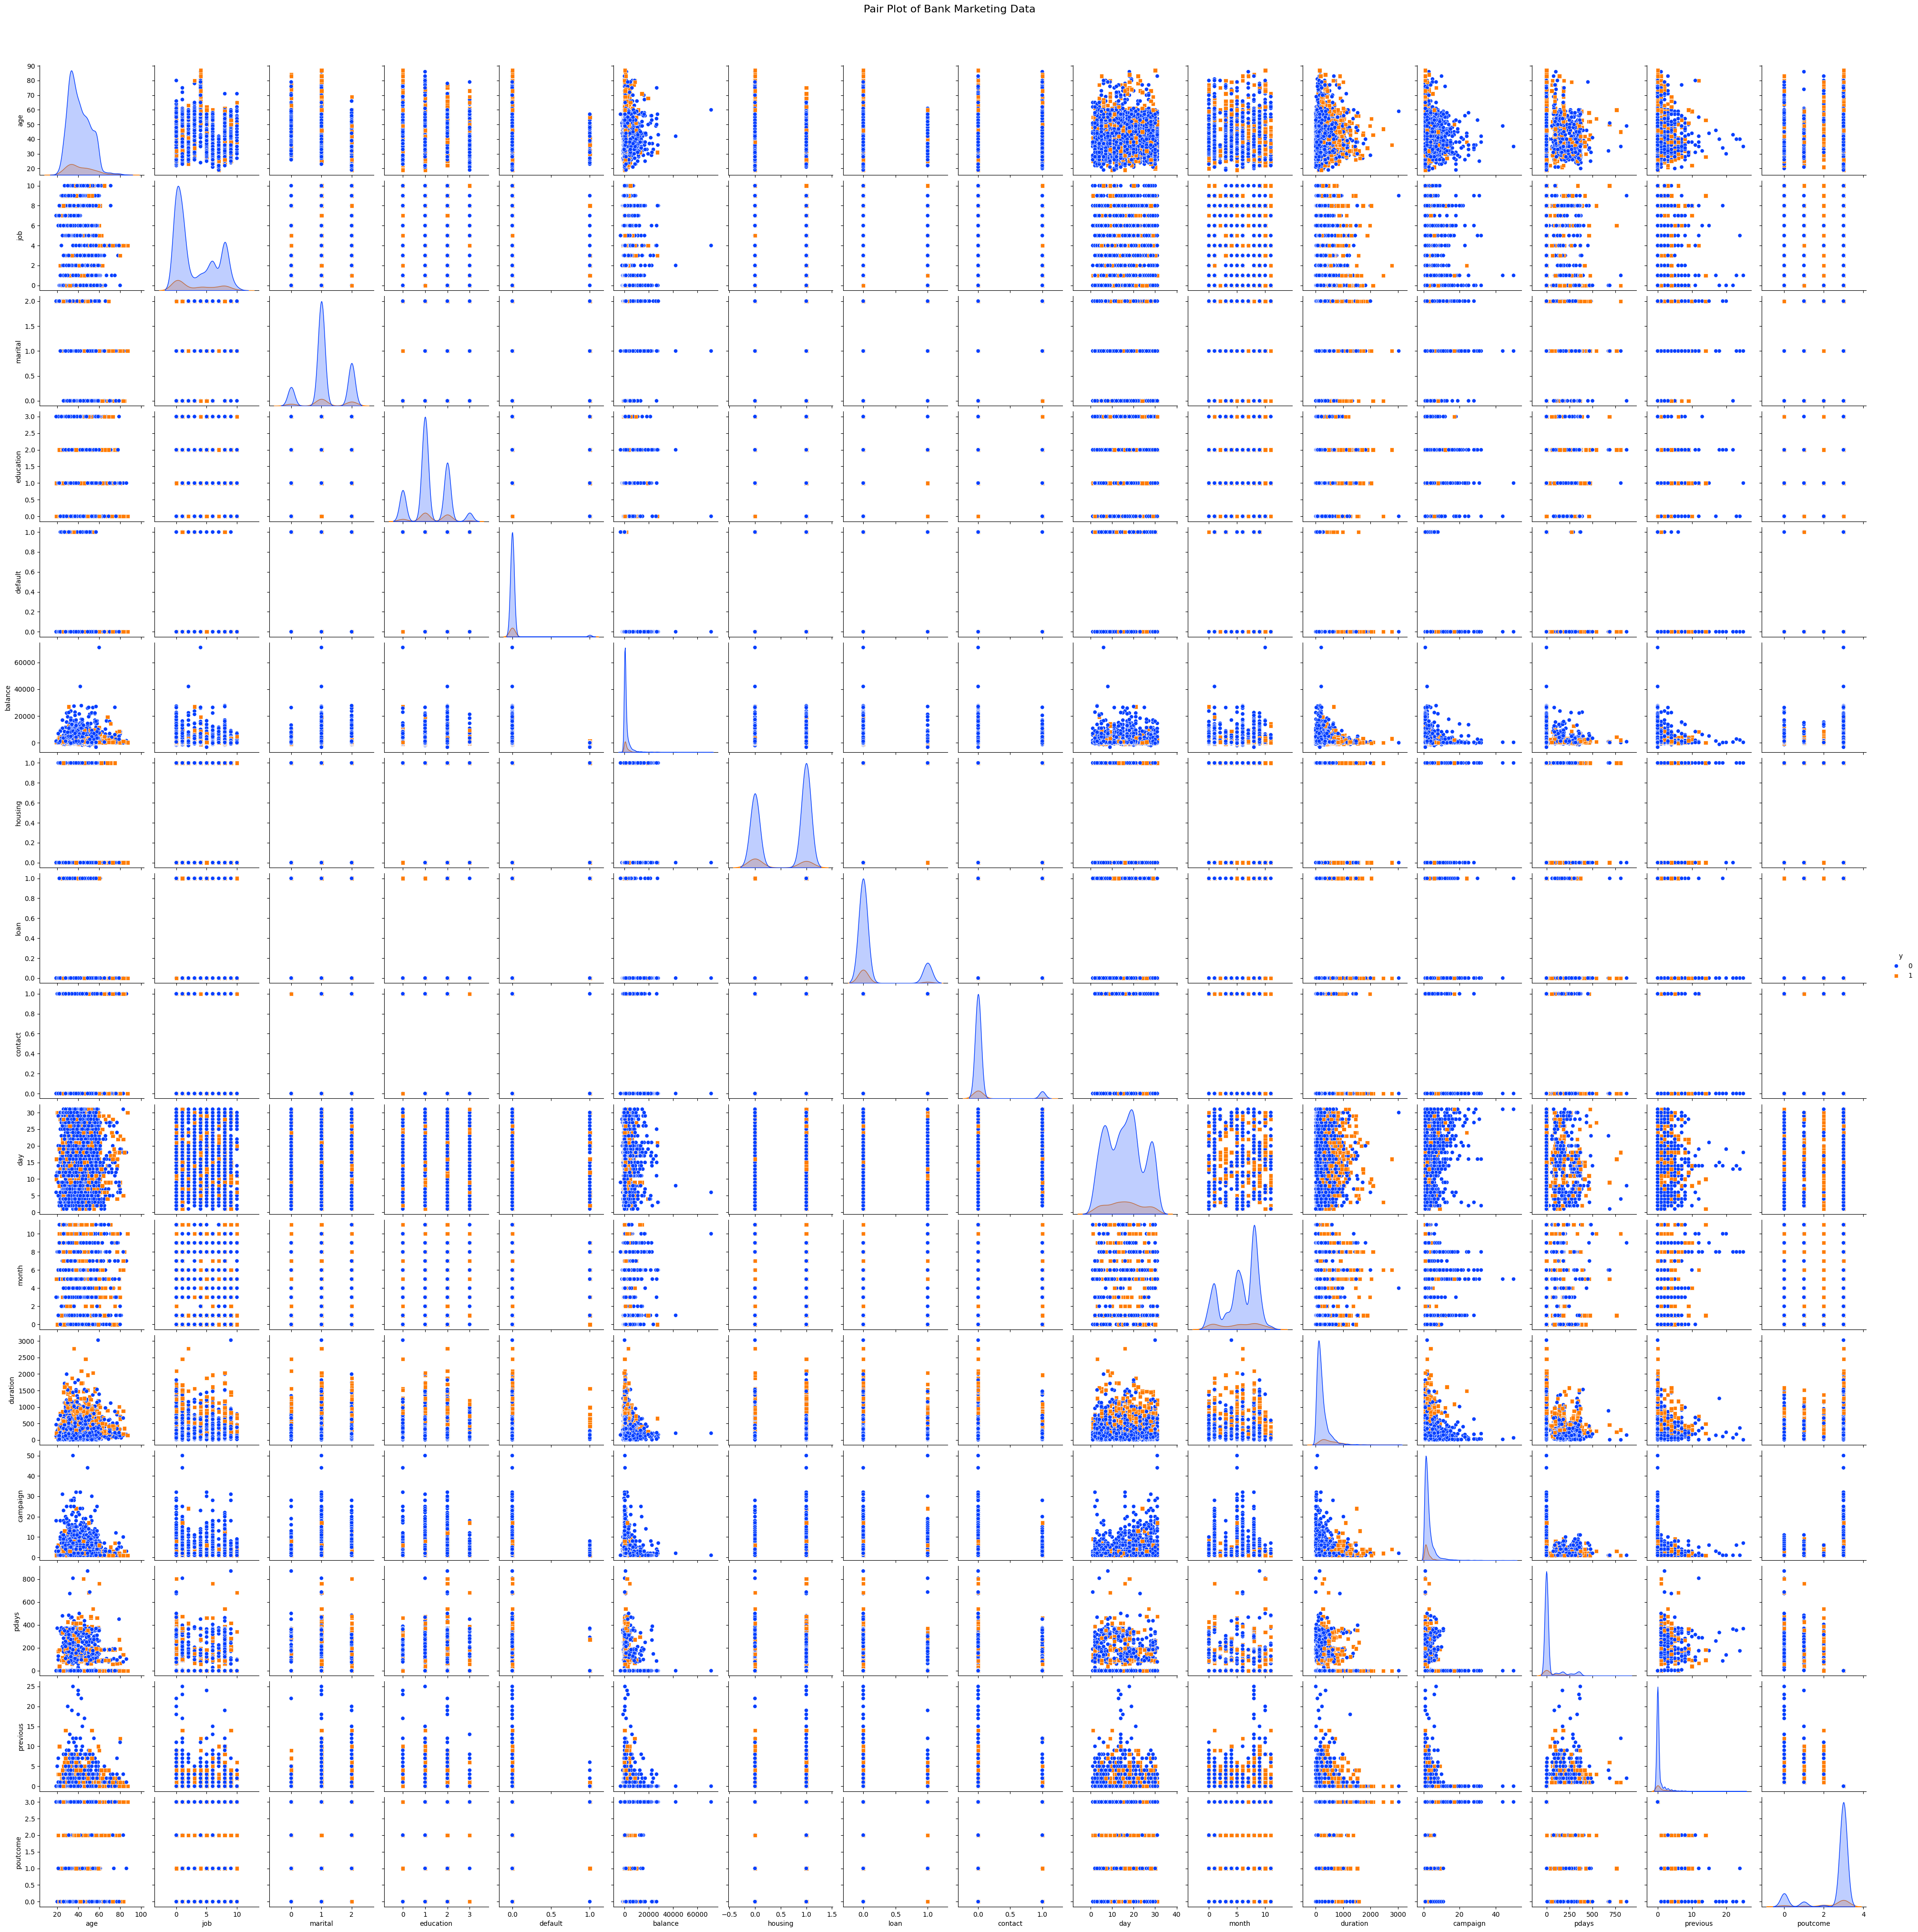

In [45]:
sns.pairplot(data, hue='y', palette='bright', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Bank Marketing Data', y=1.02, fontsize=16)
plt.show()

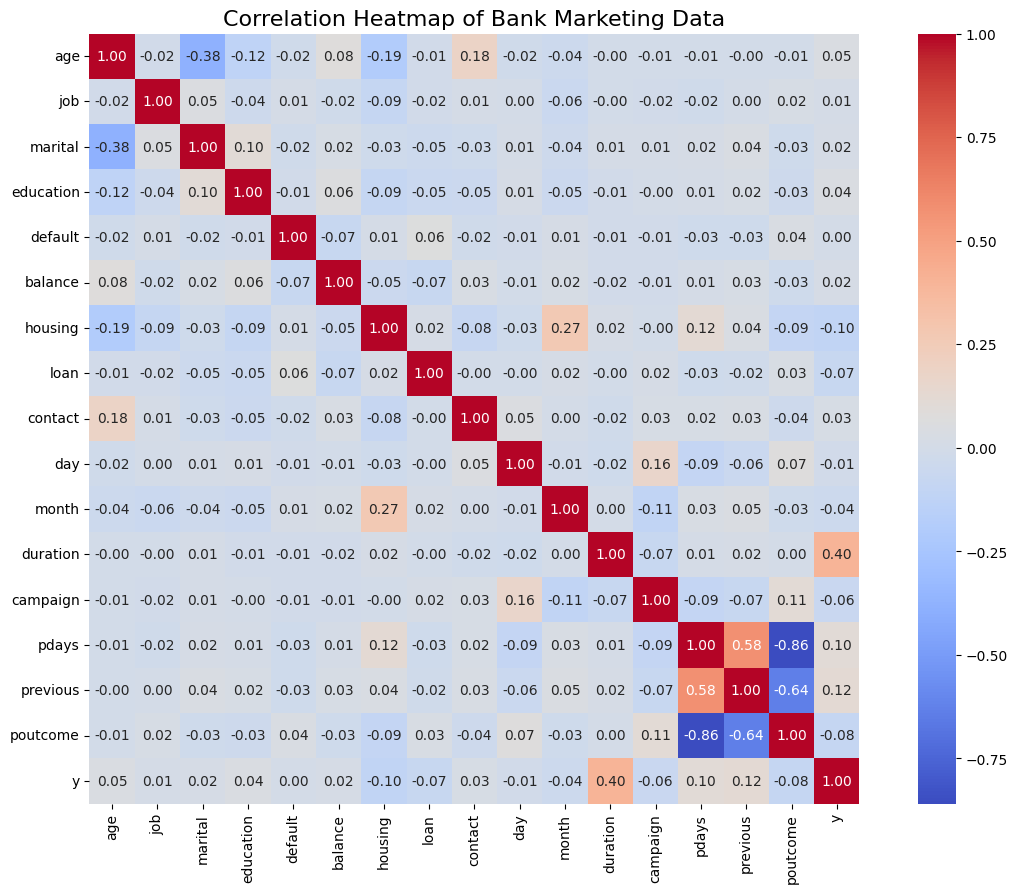

In [46]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Bank Marketing Data', fontsize=16)
plt.show()

## Machine Learning (Split Data)

In [47]:
# Defining X and y, and dropping unnecessary columns
X = data.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis=1)
y = data['y']


To start, I’ve defined X and y by dropping unnecessary columns from data based on observations from the heatmap, which helped identify which features had the least impact on the target variable. The resulting dataset (X) includes only the features most relevant for classification.

In [48]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)
print("Class distribution after SMOTEEN:")
print(y.value_counts())


Class distribution after SMOTEEN:
y
0    2941
1    2266
Name: count, dtype: int64


Class imbalance can affect the model's performance, so I used the SMOTEEN technique to create a more balanced dataset. SMOTEEN combines synthetic data generation for the minority class with ENN, an undersampling approach that removes noisy samples from the majority class. This step is essential to ensure that the model doesn’t become biased toward the majority class.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


With a balanced dataset, I split the data into training and testing sets (80% for training and 20% for testing). This setup ensures the model can generalize well to new data

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [51]:
y_pred_rf = rf_classifier.predict(X_test)


In [52]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')


Accuracy: 0.9942


In [53]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix Random Forest:\n", cm_rf)



Confusion Matrix Random Forest:
 [[581   6]
 [  0 455]]


In [54]:
from sklearn.metrics import classification_report

class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest:\n", class_report_rf)


Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       587
           1       0.99      1.00      0.99       455

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042



The Random Forest model has high accuracy, precision, and recall scores, suggesting it’s well-suited to the data. With balanced metrics and low error rates, Random Forest is a strong choice for this classification task, particularly for datasets with some complexity.

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [56]:
y_pred_gb = gb_model.predict(X_test)


In [57]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb:.4f}')


Accuracy: 0.9789


In [58]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix Gradient Boosting:\n", cm_gb)



Confusion Matrix Gradient Boosting:
 [[570  17]
 [  5 450]]


In [59]:
class_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report Gradient Boosting:\n", class_report_gb)


Classification Report Gradient Boosting:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       587
           1       0.96      0.99      0.98       455

    accuracy                           0.98      1042
   macro avg       0.98      0.98      0.98      1042
weighted avg       0.98      0.98      0.98      1042



The Gradient Boosting model performs well, with a high accuracy and balanced metrics across classes. While it slightly underperforms compared to Random Forest, Gradient Boosting remains a competitive option, particularly on data that benefits from sequential error correction.

Both classifiers perform excellently, with Random Forest achieving slightly higher metrics across the board. The choice between them may depend on other factors, such as model interpretability or computational efficiency, but for this dataset, Random Forest appears to be the stronger performer.